In [11]:
import pandas as pd
import numpy as np
import shap

In [10]:
import pickle
f = open("output/model_catboostvanilla","rb")
model = pickle.load(f)

f = open("output/train_info.pickle","rb")
train_x, train_y, num_x, cat_x = pickle.load(f)

In [32]:
TREEMODEL = True # set true when using a tree like model. Much faster
shap.initjs()
if TREEMODEL:
    explainer = shap.TreeExplainer(model.named_steps["model"])
    observations = model.named_steps["preprocess"].transform(train_x.sample(100, random_state=42)) #note the toarray
    all_x = num_x + cat_x
    
    from catboost  import Pool
    shap_values = explainer.shap_values(Pool(observations, cat_features=cat_x))
    # cat_x_ind = list(range(len(num_x),len(train_x.columns))) # in the pipeline categorical comes after numeric
    # shap_values = explainer.shap_values(Pool(observations, cat_features=cat_x_ind)) #possibly for catboost

else:
    train_trans = model.named_steps["preprocess"].transform(train_x.sample(100, random_state=18))
    explainer = shap.KernelExplainer(model.named_steps["model"].predict,train_trans)
    observations = model.named_steps["preprocess"].transform(train_x.sample(10, random_state=42))
    all_x = num_x + list(model['preprocess'].transformers_[1][1]['onehot_cat'].get_feature_names(cat_x))
    shap_values = explainer.shap_values(observations)

In [24]:
model.named_steps["model"].get_params()

{'loss_function': 'RMSE',
 'silent': True,
 'cat_features': ['MSZoning',
  'LandContour',
  'LotConfig',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'Foundation',
  'Heating',
  'CentralAir',
  'Electrical',
  'GarageType',
  'GarageFinish',
  'Fence',
  'MiscFeature',
  'SaleType',
  'SaleCondition']}

In [28]:
observations.columns[154]

'MSZoning'

In [7]:
num_x

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,GarageArea_log,WoodDeckSF_log,OpenPorchSF_log,EnclosedPorch_log,3SsnPorch_log,ScreenPorch_log,PoolArea_log,MiscVal_log,YearRemodAdd_log,AllSF_log
0,60,RL,65.0,8450,2,NaN,4,Lvl,Inside,3,...,6.308098,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,7.602900,7.850493
1,20,RL,80.0,9600,2,NaN,4,Lvl,FR2,3,...,6.133398,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,7.589336,7.833996
2,60,RL,68.0,11250,2,NaN,3,Lvl,Inside,3,...,6.411818,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,7.602401,7.903596
3,70,RL,60.0,9550,2,NaN,3,Lvl,Corner,3,...,6.466145,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,7.586296,7.813592
4,60,RL,84.0,14260,2,NaN,3,Lvl,FR2,3,...,6.729824,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,7.601402,8.114923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,FV,62.0,7500,2,2.0,4,Lvl,Inside,3,...,5.993961,0.000000,4.736198,0.000000,0.0,0.0,0.0,0.0,7.603898,7.800982
1455,60,RL,62.0,7917,2,NaN,4,Lvl,Inside,3,...,6.133398,0.000000,3.713572,0.000000,0.0,0.0,0.0,0.0,7.601402,7.863651
1456,20,RL,85.0,13175,2,NaN,4,Lvl,Inside,3,...,6.216606,5.857933,0.000000,0.000000,0.0,0.0,0.0,0.0,7.595387,8.193124
1458,20,RL,68.0,9717,2,NaN,4,Lvl,Inside,3,...,5.484797,5.905362,0.000000,4.727388,0.0,0.0,0.0,0.0,7.599401,7.676474


In [56]:
i = 0
shap.force_plot(explainer.expected_value, shap_values[i], 
                features=observations[i], feature_names=all_x)

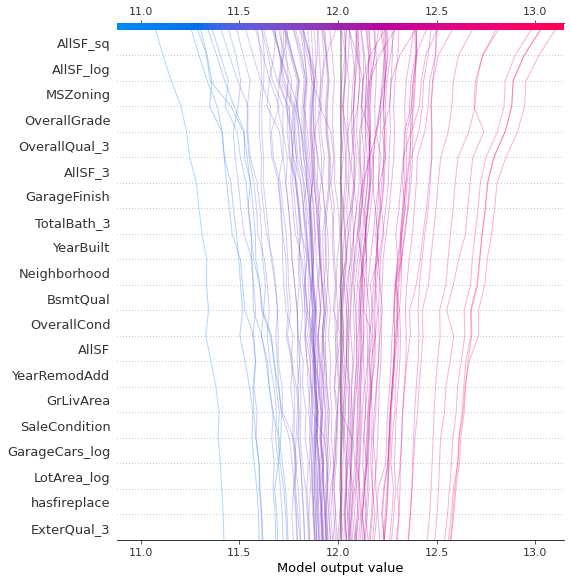

In [33]:
shap.decision_plot(explainer.expected_value, shap_values, all_x,alpha=0.3)

In [58]:
shap.force_plot(explainer.expected_value, shap_values,
                features=observations, feature_names=all_x)

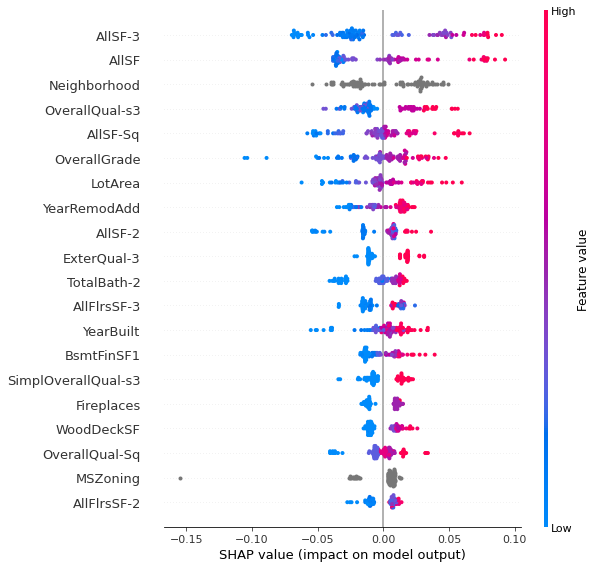

In [59]:
shap.summary_plot(shap_values, features=observations, feature_names=all_x)

In [60]:
#https://github.com/slundberg/shap/issues/373
# https://github.com/slundberg/shap/issues/662
shap.dependence_plot("LotArea", shap_values, 
                     pd.DataFrame(observations, columns=all_x), dot_size=10, x_jitter=0.02, alpha=0.5)

ValueError: could not convert string to float: 'RM'

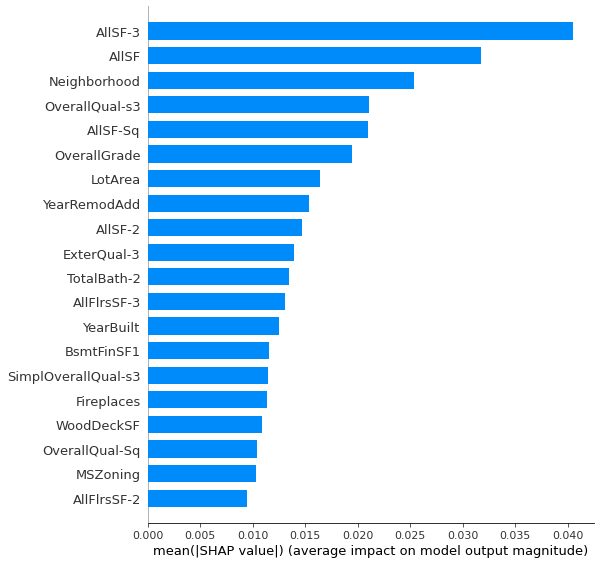

In [48]:
shap.summary_plot(shap_values, observations, plot_type="bar", feature_names=all_x)

- Additionally could also have interpreted the errors here to see if everything is randomly distributed